# Step 1 - Load Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report, f1_score

# Step 2 - Read in the Data

In [2]:
# Read dataset into notebook
df = pd.read_csv('CandidateSummaryAction1.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

can_id                                          can_nam can_off  \
0     H2GA12121                                 ALLEN, RICHARD W       H   
1     H6PA02171                                    EVANS, DWIGHT       H   
2     H6FL04105                                 RUTHERFORD, JOHN       H   
3     H4MT01041                                    ZINKE, RYAN K       H   
4     H8CA09060                                     LEE, BARBARA       H   
5     H6NC04037                                  PRICE, DAVID E.       H   
6     H2WI02124                                      POCAN, MARK       H   
7     H2MA09072                                   LYNCH, STEPHEN       H   
8     H6OR02116                            WALDEN, GREGORY P MR.       H   
9     H2MA04073                            KENNEDY, JOSEPH P III       H   
10    H8WI09050                      SENSENBRENNER, F. JAMES JR.       H   
11    H0FL08208                                  WEBSTER, DANIEL       H   
12    H8ME01120                               PINGREE, CHELLIE M       H   
13    H6FL01119                                      GAETZ, MATT       H   
14    H6FL09070                                 BILIRAKIS, GUS M       H   
15    H4PA18131                                      DOYLE, MIKE       H   
16    H8CO02137                                     POLIS, JARED       H   
17    H6MN05183                           ELLISON, KEITH MAURICE       H   
18    H8MO09153                            LUETKEMEYER, W BLAINE       H   
19    H6IL18088                              LAHOOD, DARIN MCKAY       H   
20    H8FL15107                                      POSEY, BILL       H   
21    H4VA08224                       BEYER, DONALD STERNOFF JR.       H   
22    H2MI14111                         LAWRENCE, BRENDA LULENAR       H   
23    H0OH12062                               TIBERI, PATRICK J.       H   
24    H0LA01087                               SCALISE, STEVE MR.       H   
25    H6GA05217                                   LEWIS, JOHN R.       H   
26    H4CO04090                                  BUCK, KENNETH R       H   
27    H4AL06098                                     PALMER, GARY       H   
28    H8OH05036                          LATTA, ROBERT EDWARD MR       H   
29    H6FL19087                                  ROONEY, FRANCIS       H   
30    H2MO02102                                   WAGNER, ANN L.       H   
31    H4NC01046                                 BUTTERFIELD, G K       H   
32    H8PA01153                                  BRADY, ROBERT A       H   
33    H0SD00054                                NOEM, KRISTI LYNN       H   
34    H0MO06073                        GRAVES, SAMUEL B JR 'SAM'       H   
35    H0ID01253                           LABRADOR, RAUL R. HON.       H   
36    H4MN06087                           EMMER, THOMAS EARL JR.       H   
37    H8MA05143                                TSONGAS, NICOLA S       H   
38    H2KY04121                                MASSIE, THOMAS H.       H   
39    H6DE00206                            ROCHESTER, LISA BLUNT       H   
40    H8OH11141                                  FUDGE, MARCIA L       H   
41    H0ND01026                                CRAMER, KEVIN MR.       H   
42    H4NC12100                              ADAMS, ALMA SHEALEY       H   
43    H4IL07037                              DAVIS, DANNY K. MR.       H   
44    H0MO01066                            CLAY, WILLIAM LACY JR       H   
45    H6FL02208                      DUNN, NEAL PATRICK MD, FACS       H   
46    H6FL13148                                 BUCHANAN, VERNON       H   
47    H8WI01024                                    RYAN, PAUL D.       H   
48    H4MO08162                                   SMITH, JASON T       H   
49    H2IL02172                                  KELLY, ROBIN L.       H   
50    H8MD01094                                 HARRIS, ANDREW P       H   
51    H2NC11080                                  MEADOWS,

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814 entries, 0 to 1813
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   can_id                 1814 non-null   object 
 1   can_nam                1814 non-null   object 
 2   can_off                1814 non-null   object 
 3   can_off_sta            1814 non-null   object 
 4   can_off_dis            1812 non-null   float64
 5   can_par_aff            1813 non-null   object 
 6   can_inc_cha_ope_sea    1812 non-null   object 
 7   can_str1               1789 non-null   object 
 8   can_str2               122 non-null    object 
 9   can_cit                1813 non-null   object 
 10  can_sta                1806 non-null   object 
 11  can_zip                1789 non-null   float64
 12  ind_ite_con            1570 non-null   object 
 13  ind_uni_con            1538 non-null   object 
 14  ind_con                1616 non-null   object 
 15  par_

# Step 3 - Data Cleaning

In [4]:
# Remove parentheses
df = df.replace(to_replace='\(', value="", regex=True)
df = df.replace(to_replace='\)', value="", regex=True)

In [5]:
# Remove dollar signs from columns 12-46
df[df.columns[12:47]] = df[df.columns[12:47]].replace('[\$,]', '', regex=True)

In [6]:
# Replace empty spaces in columns 12-46 with nan
df[df.columns[12:47]] = df[df.columns[12:47]].replace(r'^\s*$', np.nan, regex=True)

In [7]:
# Change the values in columns 12-46 with floats
df[df.columns[12:47]] = df[df.columns[12:47]].astype(float)

In [8]:
# replace Y in 'winner' column with 1
df['winner'] = np.where(df['winner']=='Y', 1, df['winner'])

In [9]:
# replace NaN in 'winner' column with 0
df['winner'] = df['winner'].fillna(0)

In [10]:
# Drop 'P' from 'can_off column'
df = df[df["can_off"] != 'P']
df.reset_index(drop=True, inplace=True)

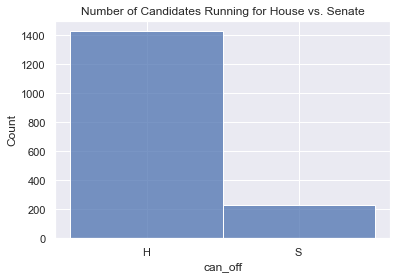

In [11]:
sns.set_theme(style="darkgrid")
sns.histplot(df, x='can_off')
plt.title('Number of Candidates Running for House vs. Senate');

In [12]:
df['can_off'].value_counts()

H    1429
S     227
Name: can_off, dtype: int64

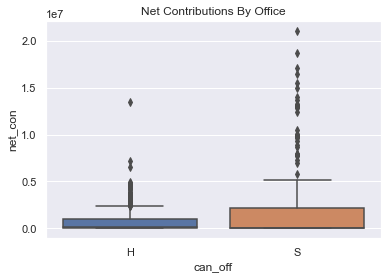

In [13]:
sns.set(style='darkgrid')
sns.boxplot(x=df['can_off'],y=df['net_con'])
plt.title('Net Contributions By Office');

In [14]:
# Drop features
df = df.drop(['can_id', 'can_str1', 'can_str2', 'can_cit', 'can_sta', 'off_to_fun',
              'off_to_leg_acc', 'exe_leg_acc_dis', 'fun_dis', 'cov_sta_dat', 'cov_end_dat',
              'votes', 'can_nam', 'can_off_sta'], axis=1)

In [15]:
# replace parties that are not DEM REP or IND in 'can_par_aff' column with 'OTHER'
df['can_par_aff'] = np.where((df['can_par_aff'] != ('REP')) & (df['can_par_aff'] != ('DEM')) & (df['can_par_aff'] != ('IND')),
                             'OTHER', df['can_par_aff'])

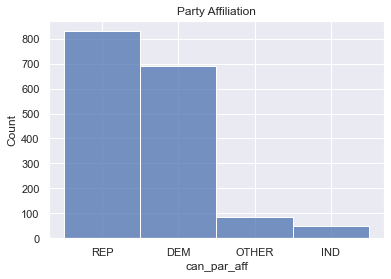

In [16]:
sns.set_theme(style="darkgrid")
sns.histplot(df, x='can_par_aff')
plt.title('Party Affiliation');

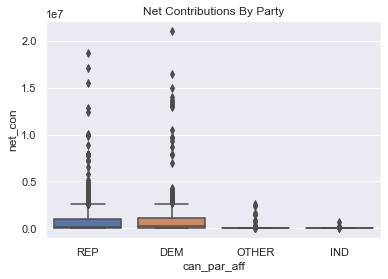

In [17]:
sns.set(style='darkgrid')
sns.boxplot(x=df['can_par_aff'],y=df['net_con'])
plt.title('Net Contributions By Party');

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   can_off                1656 non-null   object 
 1   can_off_dis            1654 non-null   float64
 2   can_par_aff            1656 non-null   object 
 3   can_inc_cha_ope_sea    1654 non-null   object 
 4   can_zip                1635 non-null   float64
 5   ind_ite_con            1509 non-null   float64
 6   ind_uni_con            1479 non-null   float64
 7   ind_con                1545 non-null   float64
 8   par_com_con            378 non-null    float64
 9   oth_com_con            987 non-null    float64
 10  can_con                616 non-null    float64
 11  tot_con                1595 non-null   float64
 12  tra_fro_oth_aut_com    251 non-null    float64
 13  can_loa                603 non-null    float64
 14  oth_loa                59 non-null     float64
 15  tot_

# Step 3 - EDA

In [19]:
# Correlation
df.corr()

can_off_dis  can_zip  ind_ite_con  ind_uni_con  \
can_off_dis                   1.00     0.06        -0.10        -0.09   
can_zip                       0.06     1.00         0.08         0.00   
ind_ite_con                  -0.10     0.08         1.00         0.71   
ind_uni_con                  -0.09     0.00         0.71         1.00   
ind_con                      -0.10     0.06         0.98         0.83   
par_com_con                  -0.12     0.05         0.40         0.31   
oth_com_con                  -0.05     0.30         0.60         0.25   
can_con                       0.01    -0.01         0.04        -0.02   
tot_con                      -0.08     0.13         0.98         0.75   
tra_fro_oth_aut_com          -0.13     0.07         0.40         0.20   
can_loa                      -0.03     0.00         0.11         0.03   
oth_loa                      -0.13    -0.04         0.24         0.51   
tot_loa                      -0.04    -0.00         0.11         0.04   
off_to_ope_exp               -0.03     0.08         0.30         0.21   
oth_rec                      -0.02     0.02         0.32         0.08   
tot_rec                      -0.09     0.13         0.95         0.71   
ope_exp                      -0.09     0.10         0.92         0.71   
tra_to_oth_aut_com           -0.12     0.12        -0.04        -0.02   
can_loa_rep                  -0.06     0.05         0.08         0.09   
oth_loa_rep                   0.13     0.20         0.43        -0.03   
tot_loa_rep                  -0.05     0.05         0.09         0.08   
ind_ref                      -0.13    -0.04         0.50         0.37   
par_com_ref                  -0.25    -0.14         0.45         0.43   
oth_com_ref                  -0.13     0.03         0.28         0.10   
tot_con_ref                  -0.13    -0.03         0.52         0.37   
oth_dis                      -0.02     0.12         0.27         0.02   
tot_dis                      -0.09     0.12         0.93         0.70   
cas_on_han_beg_of_per        -0.07     0.08         0.46         0.19   
cas_on_han_clo_of_per        -0.04     0.16         0.59         0.25   
net_con                      -0.08     0.13         0.97         0.75   
net_ope_exp                  -0.09     0.09         0.90         0.74   
deb_owe_by_com               -0.04    -0.02         0.06         0.05   
deb_owe_to_com               -0.00    -0.04        -0.11        -0.12   
winner                        0.04     0.29         0.29         0.11   

                       ind_con  par_com_con  oth_com_con  can_con  tot_con  \
can_off_dis              -0.10        -0.12        -0.05     0.01    -0.08   
can_zip                   0.06         0.05         0.30    -0.01     0.13   
ind_ite_con               0.98         0.40         0.60     0.04     0.98   
ind_uni_con               0.83         0.31         0.25    -0.02     0.75   
ind_con                   1.00         0.39         0.54    -0.00     0.96   
par_com_con               0.39         1.00         0.34    -0.02     0.41   
oth_com_con               0.54         0.34         1.00    -0.02     0.71   
can_con                  -0.00        -0.02        -0.02     1.00     0.46   
tot_con                   0.96         0.41         0.71     0.46     1.00   
tra_fro_oth_aut_com       0.37         0.60         0.27    -0.09     0.38   
can_loa                   0.09         0.08         0.01     0.31     0.16   
oth_loa                   0.32        -0.24        -0.05     0.05     0.27   
tot_loa                   0.10         0.08         0.01     0.30     0.15   
off_to_ope_exp            0.30         0.41         0.35     0.00     0.34   
oth_rec                   0.28         0.12         0.23    -0.02     0.28   
tot_rec                   0.94         0.41         0.68     0.43     0.97   
ope_exp                   0.91         0.39         0.62     0.47     0.94   
tra_to_oth_aut_com       -0.04         0.29         0.08    -0.

In [20]:
# Correlation to with 'winner' column  
correlations = df.corr()['winner'].map(abs).sort_values(ascending=False)
correlations

winner                  1.00
oth_com_con             0.60
cas_on_han_clo_of_per   0.44
net_con                 0.40
tot_con                 0.39
tot_rec                 0.37
par_com_ref             0.35
tot_dis                 0.33
ope_exp                 0.29
can_zip                 0.29
ind_ite_con             0.29
net_ope_exp             0.28
ind_con                 0.27
oth_loa_rep             0.26
oth_dis                 0.25
tra_to_oth_aut_com      0.24
cas_on_han_beg_of_per   0.21
deb_owe_to_com          0.20
off_to_ope_exp          0.14
oth_com_ref             0.12
tot_loa_rep             0.12
oth_rec                 0.12
can_loa_rep             0.11
ind_uni_con             0.11
ind_ref                 0.10
oth_loa                 0.10
tot_con_ref             0.10
tot_loa                 0.09
can_loa                 0.09
par_com_con             0.05
deb_owe_by_com          0.05
can_off_dis             0.04
can_con                 0.03
tra_fro_oth_aut_com     0.02
Name: winner, 

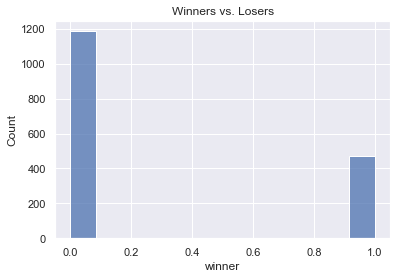

In [21]:
sns.histplot(df, x="winner")
plt.title('Winners vs. Losers');

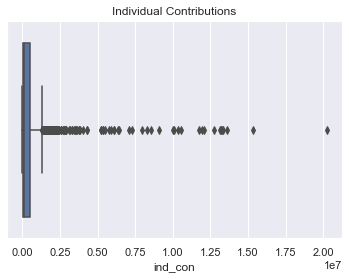

In [22]:
sns.set_theme(style='darkgrid')
ax = sns.boxplot(x=df['ind_con'])
plt.title('Individual Contributions');

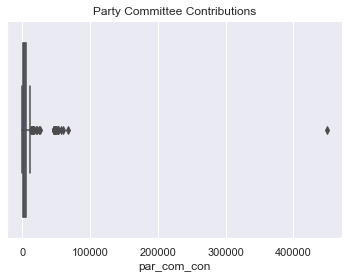

In [23]:
sns.set_theme(style='darkgrid')
ax = sns.boxplot(x=df['par_com_con'])
plt.title('Party Committee Contributions');

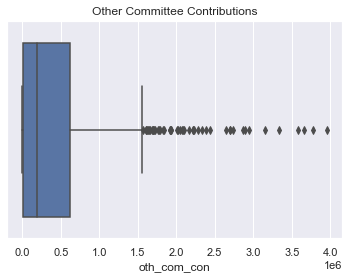

In [24]:
sns.set_theme(style='darkgrid')
ax = sns.boxplot(x=df['oth_com_con'])
plt.title('Other Committee Contributions');

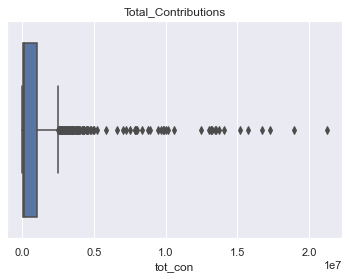

In [25]:
sns.set_theme(style='darkgrid')
ax = sns.boxplot(x=df['tot_con'])
plt.title('Total_Contributions');

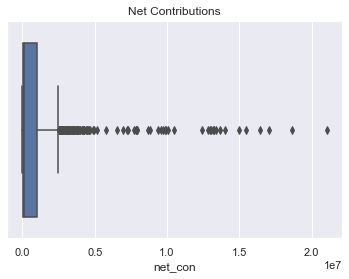

In [26]:
sns.set_theme(style='darkgrid')
ax = sns.boxplot(x=df['net_con'])
plt.title('Net Contributions');

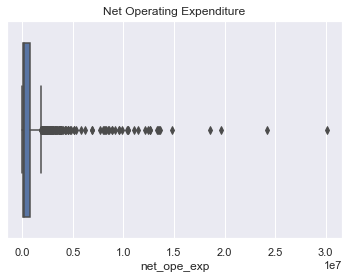

In [27]:
sns.set_theme(style='darkgrid')
ax = sns.boxplot(x=df['net_ope_exp'])
plt.title('Net Operating Expenditure');

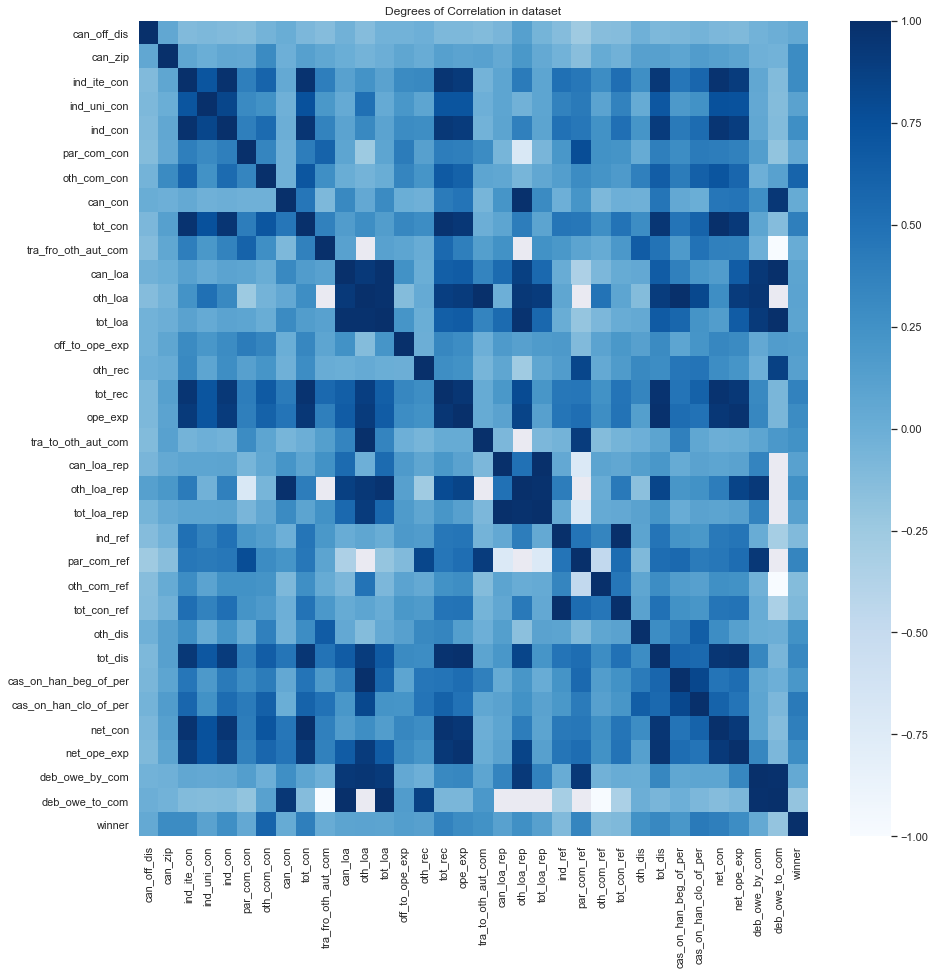

In [28]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=False, cmap='Blues', center= 0, ax=ax)
plt.title('Degrees of Correlation in dataset');

# Step 4 - Modelling

**Run Base Model**

In [29]:
# Run dummy classifier to get baseline prediction
from sklearn.dummy import DummyClassifier
X = df.drop('winner', axis=1)
y = df['winner']
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.716183574879227

**Data Preprocessing**

In [30]:
# Create matrix of features
X = df.drop('winner', axis = 1) # grabs everything else but 'winner'

# Create target variable
y = df['winner'] # y is the column we're trying to predict

# Create a list of the features to be used in the model
feature_cols = X.columns

In [31]:
# Use x and y variables to split the training data into train and test set then scale that data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 1149 to 1061
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   can_off                1242 non-null   object 
 1   can_off_dis            1240 non-null   float64
 2   can_par_aff            1242 non-null   object 
 3   can_inc_cha_ope_sea    1240 non-null   object 
 4   can_zip                1229 non-null   float64
 5   ind_ite_con            1134 non-null   float64
 6   ind_uni_con            1113 non-null   float64
 7   ind_con                1160 non-null   float64
 8   par_com_con            280 non-null    float64
 9   oth_com_con            742 non-null    float64
 10  can_con                472 non-null    float64
 11  tot_con                1200 non-null   float64
 12  tra_fro_oth_aut_com    189 non-null    float64
 13  can_loa                448 non-null    float64
 14  oth_loa                43 non-null     float64
 15  t

In [33]:
# Define categorical columns
cat_cols = [col for col in X_train.columns if X_train[col].dtypes not in ['float64', 'int64']]
cat_cols

['can_off', 'can_par_aff', 'can_inc_cha_ope_sea']

In [34]:
# Define numerical colummns
num_cols = [col for col in X_train.columns if col not in cat_cols]
num_cols

['can_off_dis',
 'can_zip',
 'ind_ite_con',
 'ind_uni_con',
 'ind_con',
 'par_com_con',
 'oth_com_con',
 'can_con',
 'tot_con',
 'tra_fro_oth_aut_com',
 'can_loa',
 'oth_loa',
 'tot_loa',
 'off_to_ope_exp',
 'oth_rec',
 'tot_rec',
 'ope_exp',
 'tra_to_oth_aut_com',
 'can_loa_rep',
 'oth_loa_rep',
 'tot_loa_rep',
 'ind_ref',
 'par_com_ref',
 'oth_com_ref',
 'tot_con_ref',
 'oth_dis',
 'tot_dis',
 'cas_on_han_beg_of_per',
 'cas_on_han_clo_of_per',
 'net_con',
 'net_ope_exp',
 'deb_owe_by_com',
 'deb_owe_to_com']

In [35]:
# Create pipelines for categorical and numerical columns
cat_pipe = Pipeline(steps=[
    ('simp', SimpleImputer(strategy = 'constant', fill_value='N/A')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_pipe = Pipeline(steps=[
    ('simp', SimpleImputer(strategy = 'constant', fill_value=0)),
    ('scaler', StandardScaler())
])

In [36]:
# Fit and transform training data in numerical columns
num_pipe.fit_transform(X_train[num_cols])

array([[ 4.25705408, -0.2948057 , -0.37655433, ..., -0.36932788,
        -0.23045181, -0.04042312],
       [-0.06095744, -0.29516778, -0.37106403, ..., -0.24928028,
         2.59545613, -0.04042312],
       [-0.54073649, -0.29508446, -0.16771129, ..., -0.06048513,
        -0.10616699, -0.04042312],
       ...,
       [ 4.06514245, -0.2948059 , -0.37657564, ..., -0.36176967,
        -0.11238575, -0.04042312],
       [-0.73264812, -0.29526124,  1.60967676, ...,  0.97763177,
        -0.23045181, -0.04042312],
       [-0.44478068, -0.29511793, -0.37636251, ..., -0.36609941,
        -0.19881568, -0.04042312]])

In [37]:
# Run ColumnTransformer on a list of tuples containing the names of our pipelines, the actual pipelines and the target columns
preprocess = ColumnTransformer(transformers=[
    ('cat_cleaning', cat_pipe, cat_cols),
    ('num_cleaning', num_pipe, num_cols)
])

In [38]:
# Create our new dataframe
pd.DataFrame(preprocess.fit_transform(X_train))

0    1    2    3    4    5    6    7    8    9     10    11    12  \
0    1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00  4.26 -0.29 -0.38   
1    1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 -0.06 -0.30 -0.37   
2    1.00 0.00 1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 -0.54 -0.30 -0.17   
3    1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 -0.16 -0.30 -0.30   
4    1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 -0.73 -0.29 -0.29   
5    1.00 0.00 1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00  1.67 -0.29  0.95   
6    1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00  2.53 -0.29 -0.31   
7    1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 -0.73 -0.30 -0.37   
8    1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00  0.99 -0.29 -0.37   
9    1.00 0.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 -0.25  1.82  0.16   
10   1.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 0.00 -0.73 -0.30  0.69   
11   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00  0.51 -0.30 -0.38   
12   1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00 -0.06 -0.30 -0.38   
13   1.00 0.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 -0.54 -0.30 -0.08   
14   1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00  3.11 -0.29 -0.32   
15   1.00 0.00 0.00 1.00 0.00 0.00 1.00 0.00 0.00 0.00  0.13 -0.30 -0.38   
16   1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00  0.99 -0.30 -0.38   
17   1.00 0.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 -0.64  1.04  0.50   
18   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00  1.76 -0.29 -0.37   
19   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 -0.16 -0.30 -0.30   
20   1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00  1.28 -0.30 -0.01   
21   0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00 -0.83 -0.29 -0.38   
22   1.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 1.00  0.90 -0.30 -0.37   
23   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 -0.54 -0.30 -0.33   
24   1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 -0.64 -0.29  0.27   
25   0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00 -0.83  2.40  4.13   
26   1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00 -0.83 -0.29 -0.37   
27   1.00 0.00 1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 -0.16 -0.29 -0.02   
28   1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00 -0.73 -0.30 -0.10   
29   1.00 0.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00  0.13 -0.29  0.38   
30   1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00  0.23 -0.30 -0.25   
31   1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00 -0.73 -0.30 -0.38   
32   1.00 0.00 0.00 1.00 0.00 0.00 1.00 0.00 0.00 0.00  0.42 -0.29 -0.36   
33   0.00 1.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 -0.83 -0.30  1.11   
34   1.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00  1.47 -0.29 -0.34   
35   1.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 0.00 -0.35 -0.29 -0.38   
36   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 -0.54 -0.30 -0.38   
37   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00  0.61 -0.30 -0.37   
38   1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 -0.44  0.36 -0.38   
39   1.00 0.00 1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00  0.42 -0.30 -0.09   
40   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00  1.95 -0.29 -0.33   
41   1.00 0.00 1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 -0.73 -0.30 -0.14   
42   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00  0.13 -0.30 -0.24   
43   0.00 1.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 -0.83 -0.29 -0.36   
44   1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00 -0.35 -0.29 -0.37   
45   1.00 0.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 -0.16 -0.30  0.26   
46   0.00 1.00 0.00 0.00 0.00 1.00 0.00 1.00 0.00 0.00 -0.83 -0.30  6.47   
47   0.00 1.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 -0.83 -0.29 -0.37   
48   0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 1.00 -0.83 -0.29 -0.38   
49   1.00 0.00 0.00 0.00 0.00 1.00 1.00 0.00 0.00 0.00  1.19 -0.29 -0.37   
50   1.00 0.00 1.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00  2.72 -0.29 -0.18   
51   1.00 0.00 1.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 

**Logistic Regression Pipeline**

In [39]:
# Create pipeline for logistic regression model
lr_pipe_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('lr', LogisticRegression())
])

In [40]:
# Define gridsearch parameters
lr_param_grid = {
    'lr__max_iter': [100, 200, 300],
    'lr__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
}

In [41]:
# Combine logistic regression pipeline with gridsearch
lr_grid = GridSearchCV(lr_pipe_model, lr_param_grid, scoring='f1')

In [42]:
# Fit pipeline with gridsearch 
lr_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_cleaning',
                                                                         Pipeline(steps=[('simp',
                                                                                          SimpleImputer(fill_value='N/A',
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['can_off',
                                                                          'ca

In [43]:
# Display best parameters
lr_grid.best_params_

{'lr__max_iter': 100, 'lr__solver': 'sag'}

In [44]:
# Create function to evaluate model, display confusion matrix and plot ROC curve
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    
    print(classification_report(y, y_pred))
    
    fig, axes=plt.subplots(ncols=2, figsize=(10,4))
    
    plot_confusion_matrix(model, X, y, cmap='Blues', normalize='true', ax=axes[0])
    
    plot_roc_curve(model, X, y, ax=axes[1])
    # Setting threshold line
    axes[1].plot([0,1],[0,1], ls=':')
    plt.tight_layout()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       888
           1       0.96      0.89      0.92       354

    accuracy                           0.96      1242
   macro avg       0.96      0.94      0.95      1242
weighted avg       0.96      0.96      0.96      1242



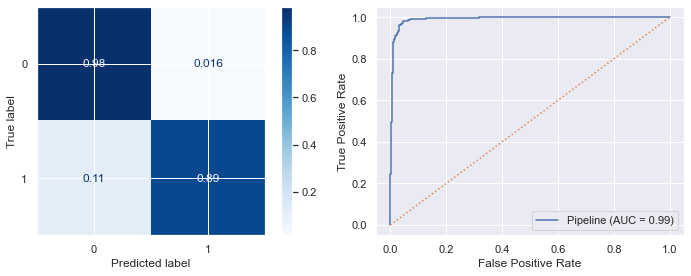

In [45]:
# Run function on training data
evaluate_model(lr_grid.best_estimator_, X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       298
           1       0.89      0.91      0.90       116

    accuracy                           0.94       414
   macro avg       0.93      0.94      0.93       414
weighted avg       0.94      0.94      0.94       414



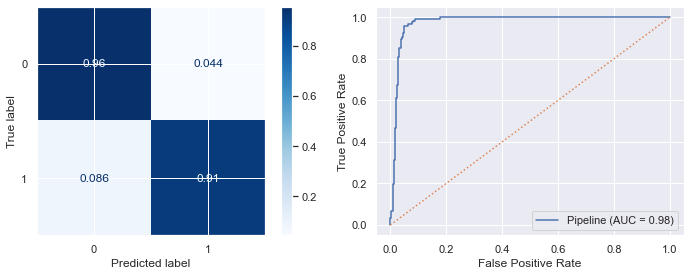

In [46]:
# Run function on test data
evaluate_model(lr_grid.best_estimator_, X_test, y_test)

**RandomForest Pipeline**

In [47]:
# Create pipeline for RandomForest
rf_pipe_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('rf', RandomForestClassifier())
])

In [48]:
# Define gridsearch parameters
rf_param_grid = {
    'rf__n_estimators': [50, 150, 250],
    'rf__max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'rf__min_samples_split': [2, 4, 6]
}

In [49]:
# Combine logistic regression pipeline with gridsearch
rf_grid = GridSearchCV(rf_pipe_model, rf_param_grid, scoring='f1')

In [50]:
# Fit pipeline with gridsearch 
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_cleaning',
                                                                         Pipeline(steps=[('simp',
                                                                                          SimpleImputer(fill_value='N/A',
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['can_off',
                                                                          'ca

In [51]:
# Display best parameters
rf_grid.best_params_

{'rf__max_features': 'sqrt',
 'rf__min_samples_split': 6,
 'rf__n_estimators': 250}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       888
           1       0.99      1.00      0.99       354

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



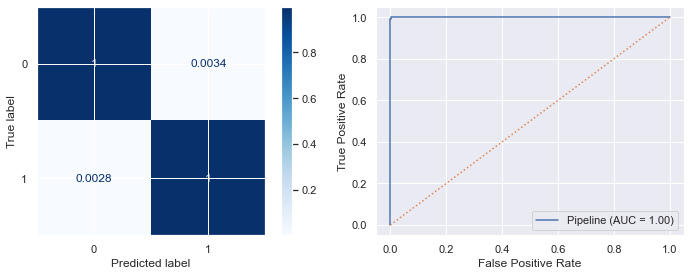

In [52]:
# Run function on training data
evaluate_model(rf_grid.best_estimator_, X_train, y_train)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       298
           1       0.90      0.96      0.93       116

    accuracy                           0.96       414
   macro avg       0.94      0.96      0.95       414
weighted avg       0.96      0.96      0.96       414



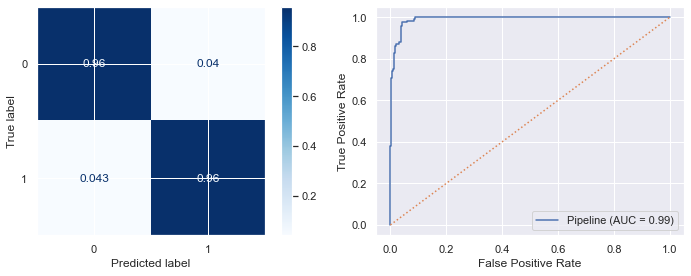

In [53]:
#Run Function on test data
evaluate_model(rf_grid.best_estimator_, X_test, y_test)

In [54]:
#feature name extraction
preprocess.named_transformers_['cat_cleaning'].named_steps['ohe'].get_feature_names()

array(['x0_H', 'x0_S', 'x1_DEM', 'x1_IND', 'x1_OTHER', 'x1_REP',
       'x2_CHALLENGER', 'x2_INCUMBENT', 'x2_N/A', 'x2_OPEN'], dtype=object)

In [55]:
# Show categorical feature names
cat_feat_names = preprocess.named_transformers_['cat_cleaning'].named_steps['ohe'].get_feature_names(cat_cols).tolist()
cat_feat_names

['can_off_H',
 'can_off_S',
 'can_par_aff_DEM',
 'can_par_aff_IND',
 'can_par_aff_OTHER',
 'can_par_aff_REP',
 'can_inc_cha_ope_sea_CHALLENGER',
 'can_inc_cha_ope_sea_INCUMBENT',
 'can_inc_cha_ope_sea_N/A',
 'can_inc_cha_ope_sea_OPEN']

In [56]:
# Create function to extract categorical and numerical feature names
def feat_importance(model, cat_cols, num_cols, label=None):
    #Get categorical and numerical names from preprocessing
    cat_feat_names = preprocess.named_transformers_['cat_cleaning'].named_steps['ohe'].get_feature_names(cat_cols).tolist()
    feat_cols = num_cols + cat_feat_names
    feat_importance=pd.Series(model.named_steps[label].feature_importances_, index=feat_cols)
    return feat_importance

In [57]:
# Show feature importance
feat_importance(rf_grid.best_estimator_, cat_cols, num_cols, label='rf')

can_off_dis                      0.00
can_zip                          0.00
ind_ite_con                      0.00
ind_uni_con                      0.00
ind_con                          0.00
par_com_con                      0.00
oth_com_con                      0.02
can_con                          0.16
tot_con                          0.00
tra_fro_oth_aut_com              0.01
can_loa                          0.00
oth_loa                          0.00
tot_loa                          0.02
off_to_ope_exp                   0.01
oth_rec                          0.02
tot_rec                          0.00
ope_exp                          0.16
tra_to_oth_aut_com               0.00
can_loa_rep                      0.06
oth_loa_rep                      0.00
tot_loa_rep                      0.01
ind_ref                          0.00
par_com_ref                      0.00
oth_com_ref                      0.01
tot_con_ref                      0.01
oth_dis                          0.07
tot_dis     

In [58]:
# Create a variable for feature importance
feat_importances = feat_importance(rf_grid.best_estimator_, cat_cols, num_cols, label='rf')

In [59]:
# Sort feature importance by weight
important_feats = feat_importances.sort_values(ascending=False).head(10)
important_feats

can_con                          0.16
ope_exp                          0.16
can_par_aff_OTHER                0.10
can_par_aff_REP                  0.09
oth_dis                          0.07
can_loa_rep                      0.06
can_inc_cha_ope_sea_CHALLENGER   0.06
can_par_aff_DEM                  0.04
can_par_aff_IND                  0.03
can_inc_cha_ope_sea_INCUMBENT    0.03
dtype: float64

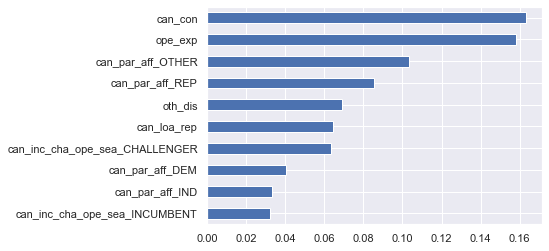

In [60]:
# Plot top 10 most important features
important_feats.sort_values().plot(kind='barh');

**XGBoost**

In [61]:
# Create pipeline for XGBoost
xg_pipe_model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('xg', XGBClassifier())
])

In [62]:
# Define gridsearch parameters
xg_param_grid = {
    'xg__min_child_weight': [1, 5, 10],
    'xg__gamma': [0.5, 1, 1.5, 2, 5],
    'xg__subsample': [0.6, 0.8, 1.0],
    'xg__colsample_bytree': [0.6, 0.8, 1.0],
    'xg__max_depth': [3, 4, 5]
}

In [63]:
# Combine logistic regression pipeline with gridsearch
xg_grid = GridSearchCV(xg_pipe_model, xg_param_grid, scoring='f1')

In [64]:
# Fit pipeline with gridsearch 
xg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat_cleaning',
                                                                         Pipeline(steps=[('simp',
                                                                                          SimpleImputer(fill_value='N/A',
                                                                                                        strategy='constant')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['can_off',
                                                                          'ca

In [65]:
# Display best parameters
xg_grid.best_params_

{'xg__colsample_bytree': 1.0,
 'xg__gamma': 1,
 'xg__max_depth': 5,
 'xg__min_child_weight': 1,
 'xg__subsample': 0.8}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       888
           1       1.00      1.00      1.00       354

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



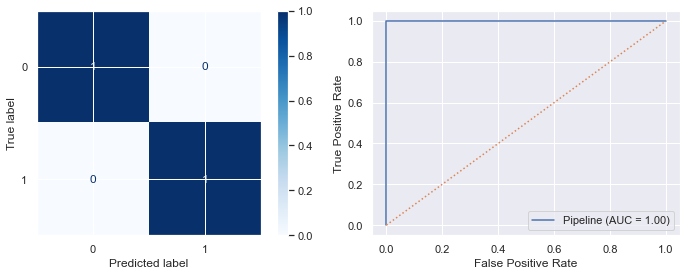

In [66]:
# Run function on training data
evaluate_model(xg_grid.best_estimator_, X_train, y_train)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       298
           1       0.89      0.97      0.93       116

    accuracy                           0.96       414
   macro avg       0.94      0.96      0.95       414
weighted avg       0.96      0.96      0.96       414



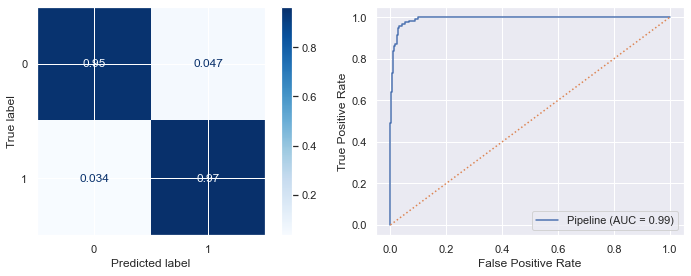

In [67]:
#Run Function on test data
evaluate_model(xg_grid.best_estimator_, X_test, y_test)

**Fin**